<a href="https://colab.research.google.com/github/AreebaAleem/Digital_Image_Processing/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your zip files
zip_paths = ['/content/drive/My Drive/PSL/train.zip',
             '/content/drive/My Drive/PSL/test.zip',
             '/content/drive/My Drive/PSL/valid.zip']

# Extraction paths
extract_to = ['/content/train/',
              '/content/test/',
              '/content/valid/']

# Create directories if they don't exist
for path in extract_to:
    os.makedirs(path, exist_ok=True)

# Extract the zip files
for zip_path, extract_path in zip(zip_paths, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Extraction Complete")


Mounted at /content/drive
Extraction Complete


In [9]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import os
import matplotlib.pyplot as plt

Found 3099 .jpg images in /content/train/train/images


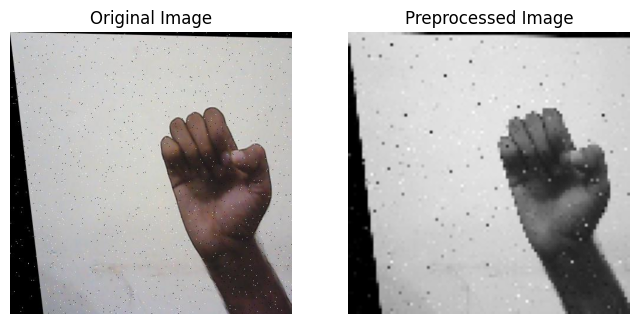

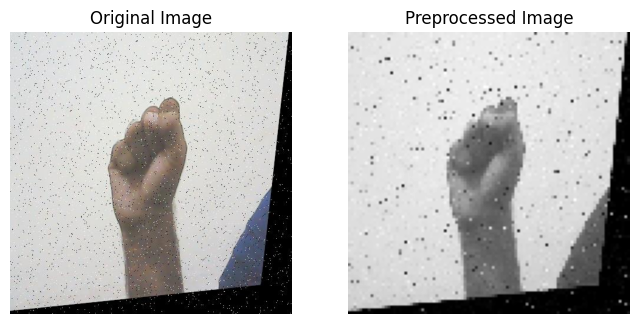

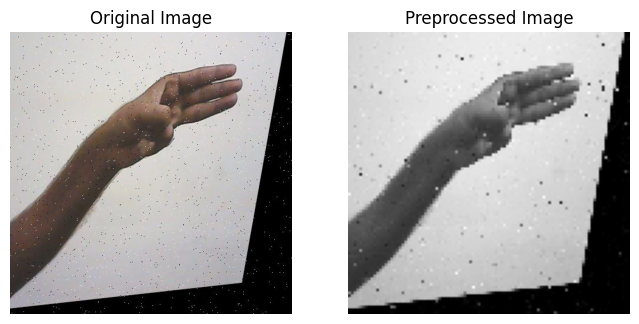

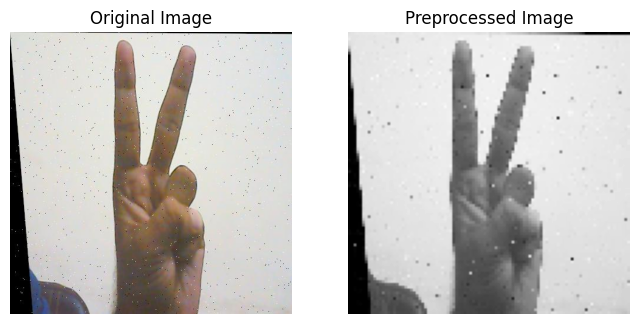

In [18]:
import random

# Define the number of images to preprocess and display
num_images_to_preprocess_and_display = 4

# Preprocessing
def preprocess_image(image_path, size=(100, 100)):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None, None

    original_image = image.copy()  # Make a copy for displaying
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, size)
    return original_image, image

# Preprocess and display a random subset of images
image_folder_path = '/content/train/train/images'
label_folder_path = '/content/train/train/labels'
images = [img for img in os.listdir(image_folder_path) if img.endswith('.jpg')]
print(f"Found {len(images)} .jpg images in {image_folder_path}")

# Select a random subset of images
selected_images = random.sample(images, min(len(images), num_images_to_preprocess_and_display))
for image_name in selected_images:
    image_path = os.path.join(image_folder_path, image_name)
    original_image, preprocessed_image = preprocess_image(image_path)
    if original_image is not None and preprocessed_image is not None:
        cv2.imwrite(image_path, preprocessed_image)

        # Display original and preprocessed images
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_image, cmap='gray')
        plt.title('Preprocessed Image')
        plt.axis('off')
        plt.show()


Found 3099 .jpg images in /content/train/train/images


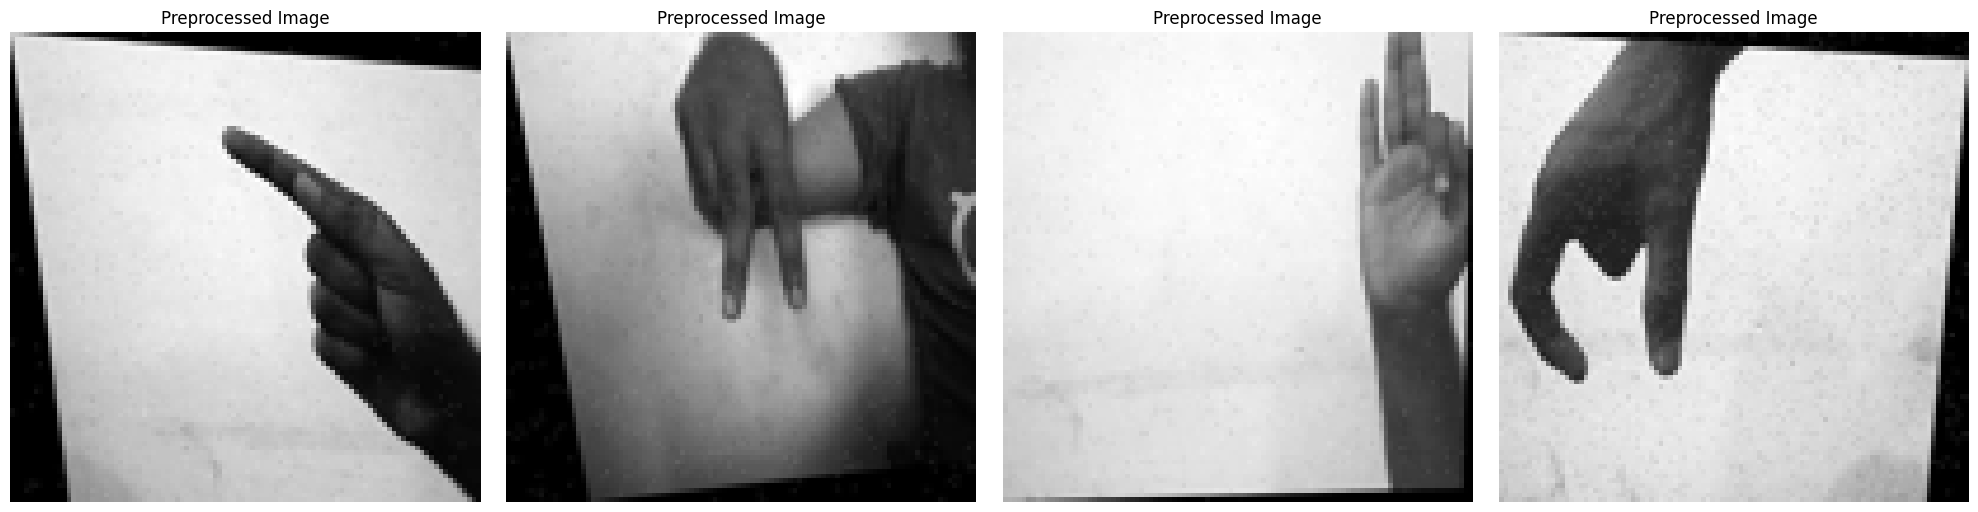

In [19]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to apply digital image processing techniques
def apply_image_processing(image):
    # Convert the image to grayscale
    processed_image = Image.fromarray(np.mean(image, axis=-1).astype(np.uint8))
    return processed_image

# Preprocessing
def preprocess_image(image_path, size=(100, 100)):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None, None

    original_image = image.copy()  # Make a copy for displaying

    # Apply image processing techniques
    processed_image = apply_image_processing(original_image)

    # Resize the processed image
    processed_image = processed_image.resize(size)

    # Convert the processed image back to numpy array
    processed_image = np.array(processed_image)

    return original_image, processed_image

# Parameters for plt.subplots
num_images_to_display = 4
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

# Preprocess and display a random subset of images
image_folder_path = '/content/train/train/images'
label_folder_path = '/content/train/train/labels'
images = [img for img in os.listdir(image_folder_path) if img.endswith('.jpg')]
print(f"Found {len(images)} .jpg images in {image_folder_path}")

# Select a random subset of images
selected_images = random.sample(images, min(len(images), num_images_to_display))
for idx, image_name in enumerate(selected_images):
    image_path = os.path.join(image_folder_path, image_name)
    original_image, preprocessed_image = preprocess_image(image_path)
    if original_image is not None and preprocessed_image is not None:
        # Display original and preprocessed images
        axes[idx].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        axes[idx].set_title('Original Image')
        axes[idx].axis('off')

        axes[idx].imshow(preprocessed_image, cmap='gray')
        axes[idx].set_title('Preprocessed Image')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [30]:
import os

# Define the directory containing your dataset
dataset_dir = '/content/train/train/labels'  # Update this with your dataset directory

# Initialize an empty dictionary to store class distribution
class_distribution = {}

# List contents of the dataset directory
# print("Contents of the dataset directory:")
# print(os.listdir(dataset_dir))

# Iterate over the files in the dataset directory
for file_name in os.listdir(dataset_dir):
    if file_name.endswith('.txt'):
        # Extract class name from file name
        class_name = file_name.split('_')[0]
        class_distribution[class_name] = class_distribution.get(class_name, 0) + 1

# Now you have the class distribution
print("\nClass Distribution:")
print(class_distribution)



Class Distribution:
{'L': 87, 'K': 171, 'S': 33, 'F': 180, 'A': 117, 'Q': 90, 'C': 165, 'E': 171, 'U': 90, 'H': 189, 'V': 84, 'J': 168, 'M': 81, 'Y': 75, 'D': 198, 'O': 75, 'P': 99, 'B': 180, 'X': 84, 'N': 81, 'G': 177, 'W': 81, 'I': 96, 'T': 87, 'swaad': 42, 'R': 93, 'Z': 78, 'aliph': 27}


In [118]:
import os

# Define the directory containing your dataset
dataset_dir = '/content/train/train/images'  # Update this with your dataset directory

# Initialize an empty dictionary to store class distribution
class_distribution = {}

# List contents of the dataset directory
# print("Contents of the dataset directory:")
# print(os.listdir(dataset_dir))

# Iterate over the files in the dataset directory
for file_name in os.listdir(dataset_dir):
    if file_name.endswith('.jpg'):
        # Extract class name from file name
        class_name = file_name.split('_')[0]
        class_distribution[class_name] = class_distribution.get(class_name, 0) + 1

# Now you have the class distribution
print("\nClass Distribution:")
print(class_distribution)



Class Distribution:
{'E': 171, 'J': 168, 'R': 93, 'M': 81, 'N': 81, 'G': 177, 'F': 180, 'I': 96, 'P': 99, 'U': 90, 'O': 75, 'C': 165, 'B': 180, 'V': 84, 'T': 87, 'L': 87, 'Y': 75, 'Q': 90, 'swaad': 42, 'K': 171, 'A': 117, 'W': 81, 'X': 84, 'S': 33, 'Z': 78, 'D': 198, 'H': 189, 'aliph': 27}


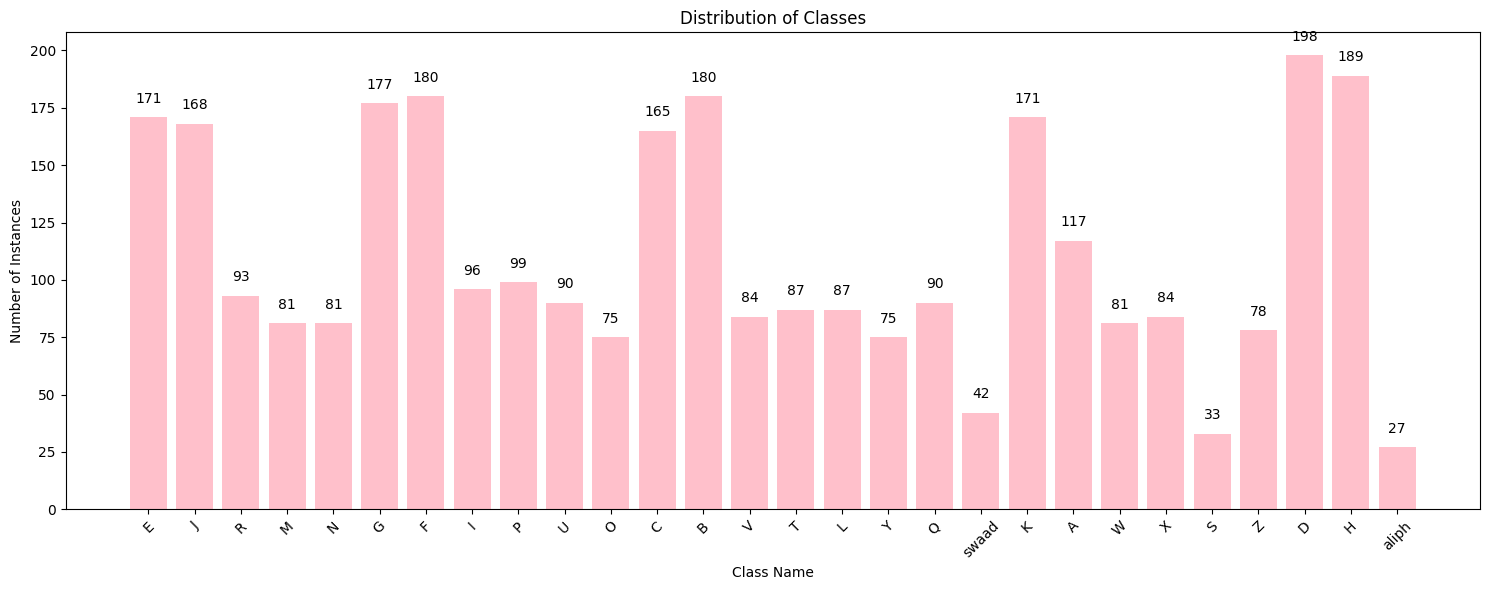

In [123]:
# import matplotlib.pyplot as plt
# # Your class distribution data
# class_distribution = {'E': 171, 'J': 168, 'R': 93, 'M': 81, 'N': 81, 'G': 177, 'F': 180, 'I': 96, 'P': 99, 'U': 90, 'O': 75, 'C': 165, 'B': 180, 'V': 84, 'T': 87, 'L': 87, 'Y': 75, 'Q': 90, 'swaad': 42, 'K': 171, 'A': 117, 'W': 81, 'X': 84, 'S': 33, 'Z': 78, 'D': 198, 'H': 189, 'aliph': 27}
# plt.figure(figsize=(15, 6))
# bars = plt.bar(class_distribution.keys(), class_distribution.values(), color='pink')

# # Displaying values on top of the bars
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')

# # Labels and title
# plt.xlabel('Class Name')
# plt.ylabel('Number of Instances')
# plt.title('Distribution of Classes')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()


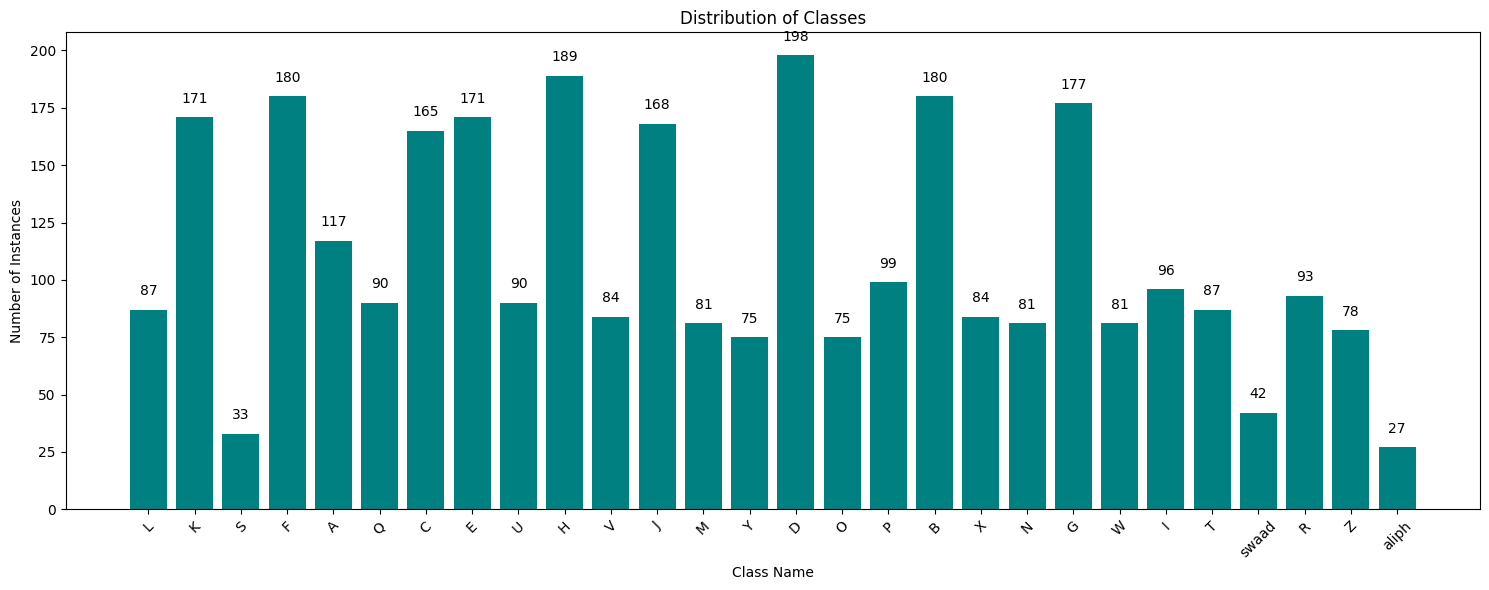

In [28]:
import matplotlib.pyplot as plt

# Your class distribution data
class_distribution = {'L': 87, 'K': 171, 'S': 33, 'F': 180, 'A': 117, 'Q': 90, 'C': 165, 'E': 171, 'U': 90,
                      'H': 189, 'V': 84, 'J': 168, 'M': 81, 'Y': 75, 'D': 198, 'O': 75, 'P': 99, 'B': 180,
                      'X': 84, 'N': 81, 'G': 177, 'W': 81, 'I': 96, 'T': 87, 'swaad': 42, 'R': 93, 'Z': 78, 'aliph': 27}

# Bar plotting
plt.figure(figsize=(15, 6))
bars = plt.bar(class_distribution.keys(), class_distribution.values(), color='teal')

# Displaying values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')

# Labels and title
plt.xlabel('Class Name')
plt.ylabel('Number of Instances')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [48]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define the directory containing your dataset
data_dir = '/content/train/train/images'  # Update this with your dataset directory

# Load data
data = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.jpg'):
        class_name = file_name.split('_')[0]
        image_path = os.path.join(data_dir, file_name)
        data.append({'image_path': image_path, 'label': class_name})

# Preprocess images
def preprocess_image(image_path, size=(100, 100)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    image = image.astype('float32') / 255.0  # Normalize
    return image

X_data = np.array([preprocess_image(entry['image_path']) for entry in data])


In [49]:
# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit([entry['label'] for entry in data])

y_data = to_categorical(label_encoder.transform([entry['label'] for entry in data]))


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [51]:
# Train the model
history = model.fit(X_data, y_data, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
78/78 [==============================] - 50s 615ms/step - loss: 3.2856 - accuracy: 0.0577 - val_loss: 3.2500 - val_accuracy: 0.0452
Epoch 2/20
78/78 [==============================] - 49s 626ms/step - loss: 3.2211 - accuracy: 0.0803 - val_loss: 3.1637 - val_accuracy: 0.0581
Epoch 3/20
78/78 [==============================] - 50s 639ms/step - loss: 3.0867 - accuracy: 0.1166 - val_loss: 2.9265 - val_accuracy: 0.1468
Epoch 4/20
78/78 [==============================] - 47s 608ms/step - loss: 2.9000 - accuracy: 0.1605 - val_loss: 2.7528 - val_accuracy: 0.2065
Epoch 5/20
78/78 [==============================] - 48s 611ms/step - loss: 2.6969 - accuracy: 0.2267 - val_loss: 2.5670 - val_accuracy: 0.2581
Epoch 6/20
78/78 [==============================] - 56s 718ms/step - loss: 2.5193 - accuracy: 0.2662 - val_loss: 2.4211 - val_accuracy: 0.3097
Epoch 7/20
78/78 [==============================] - 49s 629ms/step - loss: 2.3509 - accuracy: 0.3263 - val_loss: 2.2498 - val_accuracy: 0.3548

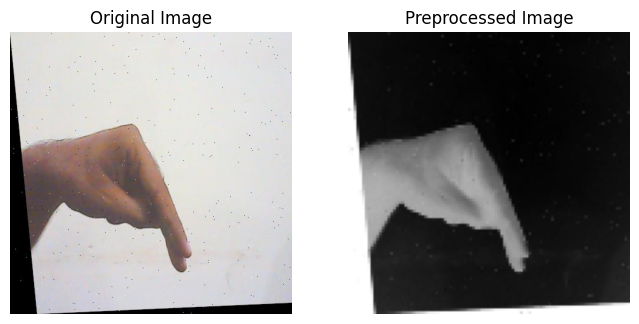

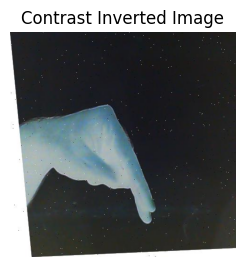

In [75]:
import cv2

# Preprocess image with noise removal and contrast inversion
def preprocess_image(image_path, size=(100, 100)):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None

    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Invert contrast
    contrast_inverted_image = 255 - blurred_image

    # Resize the preprocessed image
    preprocessed_image = cv2.resize(contrast_inverted_image, size)

    # Normalize the image
    preprocessed_image = preprocessed_image.astype('float32') / 255.0

    return preprocessed_image

# Assuming data contains the paths to the images
# and you want to work with the first image
first_img_path = data[0]['image_path']  # The path to your image

# Preprocess the first image
preprocessed_image = preprocess_image(first_img_path)

# Display the original and preprocessed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(first_img_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_inverted_img, cv2.COLOR_BGR2RGB))
plt.title('Contrast Inverted Image')
plt.axis('off')
plt.show()


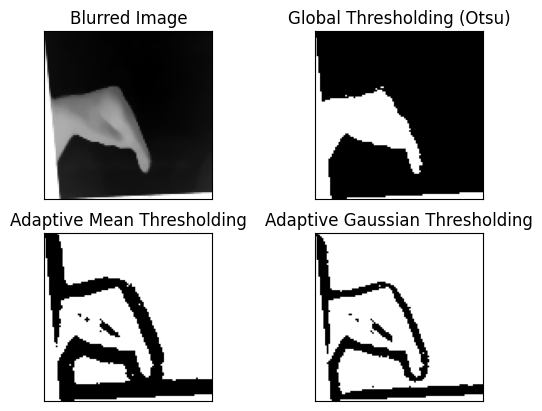

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Preprocess image with noise removal and contrast inversion
def preprocess_image(image_path, size=(100, 100)):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None

    # Convert to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 0)

    # Invert contrast
    contrast_inverted_image = 255 - blurred_image

    # Resize the preprocessed image
    preprocessed_image = cv2.resize(contrast_inverted_image, size)

    # Normalize the image
    preprocessed_image = preprocessed_image.astype('float32') / 255.0

    return preprocessed_image

# Assuming data contains the paths to the images
# and you want to work with the first image
first_img_path = data[0]['image_path']  # The path to your image

# Preprocess the first image
preprocessed_image = preprocess_image(first_img_path)

# Copy of the preprocessed image for foreground enhancement
foreground_enhanced_image = preprocessed_image.copy()

# Enhance the foreground based on the threshold value
threshold_value = 150  # Adjust this value accordingly
foreground_enhanced_image[foreground_enhanced_image <= threshold_value] = 255
foreground_enhanced_image[foreground_enhanced_image > threshold_value] = 0

# Convert preprocessed image to uint8
preprocessed_image_uint8 = (preprocessed_image * 255).astype('uint8')

# Apply median blur to the preprocessed image
blurred_image = cv2.medianBlur(preprocessed_image_uint8, 5)

# Apply global thresholding
ret, global_threshold = cv2.threshold(preprocessed_image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply adaptive mean thresholding
adaptive_mean_threshold = cv2.adaptiveThreshold(preprocessed_image_uint8, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                                cv2.THRESH_BINARY, 21, 10)

# Apply adaptive Gaussian thresholding
adaptive_gaussian_threshold = cv2.adaptiveThreshold(preprocessed_image_uint8, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                    cv2.THRESH_BINARY, 21, 10)

# List of titles and images for display
thresholding_titles = ['Blurred Image', 'Global Thresholding (Otsu)',
                       'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
thresholding_images = [blurred_image, global_threshold, adaptive_mean_threshold, adaptive_gaussian_threshold]

# Display the images with their corresponding titles
for index in range(4):
    plt.subplot(2, 2, index+1), plt.imshow(thresholding_images[index], 'gray')
    plt.title(thresholding_titles[index])
    plt.xticks([]), plt.yticks([])
plt.show()


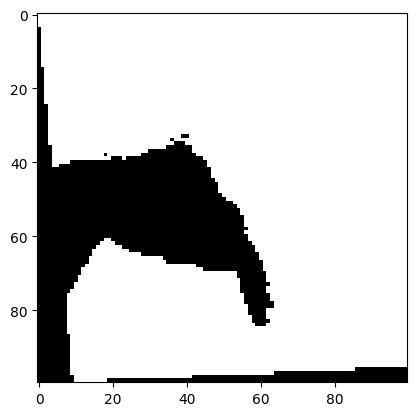

In [83]:
# Invert the binary image obtained from global thresholding
inverted_binary_image = cv2.bitwise_not(global_threshold.copy())
plt.imshow(inverted_binary_image, 'gray')
plt.show()


In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,       # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,         # shear intensity (angle in radians)
    zoom_range=0.2,          # randomly zoom in/out
    horizontal_flip=True,    # randomly flip images horizontally
    vertical_flip=False,     # randomly flip images vertically
    fill_mode='nearest'      # fill mode for points outside the input boundaries
)


In [105]:
import numpy as np

# Add channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_val, y_val))


Epoch 1/5
78/78 [==============================] - 53s 666ms/step - loss: 3.3384 - accuracy: 0.2263 - val_loss: 1.7525 - val_accuracy: 0.6065
Epoch 2/5
78/78 [==============================] - 52s 662ms/step - loss: 2.6877 - accuracy: 0.2263 - val_loss: 1.4301 - val_accuracy: 0.6952
Epoch 3/5
78/78 [==============================] - 52s 664ms/step - loss: 2.5696 - accuracy: 0.2691 - val_loss: 1.2928 - val_accuracy: 0.7226
Epoch 4/5
78/78 [==============================] - 49s 624ms/step - loss: 2.5331 - accuracy: 0.2683 - val_loss: 1.3472 - val_accuracy: 0.7274
Epoch 5/5
78/78 [==============================] - 49s 626ms/step - loss: 2.4197 - accuracy: 0.2929 - val_loss: 1.2353 - val_accuracy: 0.7484


1/1 [==============================] - 0s 26ms/step


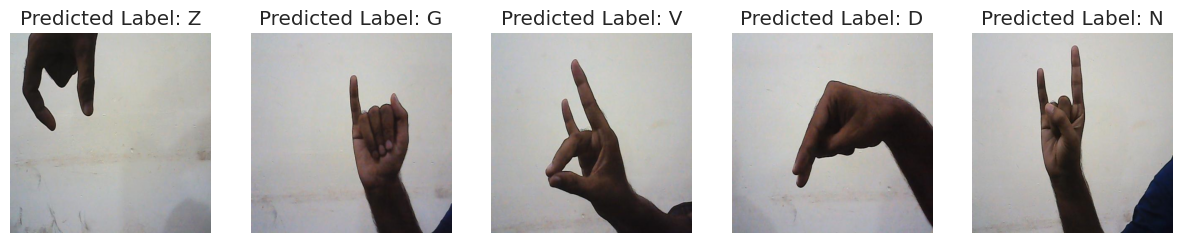

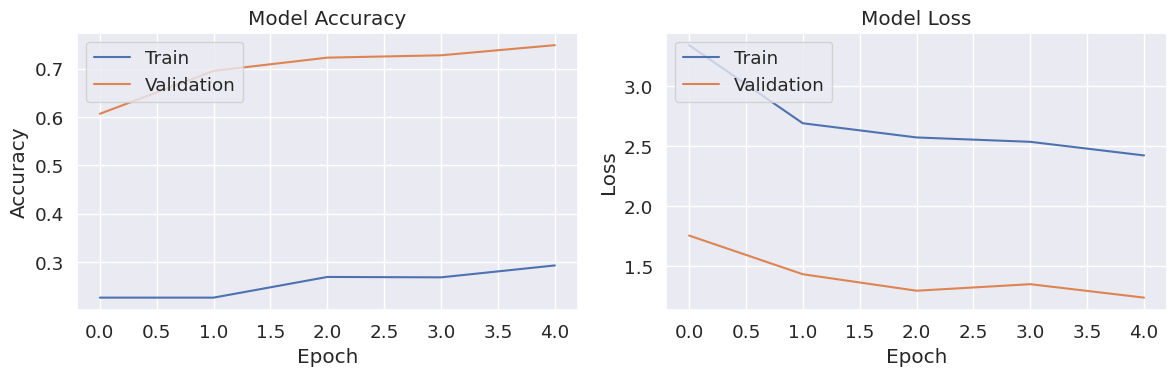

In [142]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to preprocess image
def preprocess_image(image_path, size=(100, 100)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    image = image.astype('float32') / 255.0  # Normalize
    return image

# Load the model and label encoder
# Assuming you have your model and label_encoder loaded

# Load the dataset
data_dir = '/content/test/test/images'  # Update this with your dataset directory

data = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.jpg'):
        class_name = file_name.split('_')[0]
        image_path = os.path.join(data_dir, file_name)
        data.append({'image_path': image_path, 'label': class_name})

# Choose a few random samples from the dataset
num_samples_to_display = 5
random_samples = random.sample(data, num_samples_to_display)

# Plot the images with detected sign symbols and labels
plt.figure(figsize=(15, 5))

for i, sample in enumerate(random_samples):
    image_path = sample['image_path']
    label = sample['label']

    # Preprocess the image
    image = preprocess_image(image_path)

    # Predict the label
    predicted_label = label_encoder.inverse_transform([np.argmax(model.predict(np.expand_dims(image, axis=0)))])[0]


    # Read and plot the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(image)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')

plt.show()

# Plot training and validation metrics
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Test Accuracy: 1.0


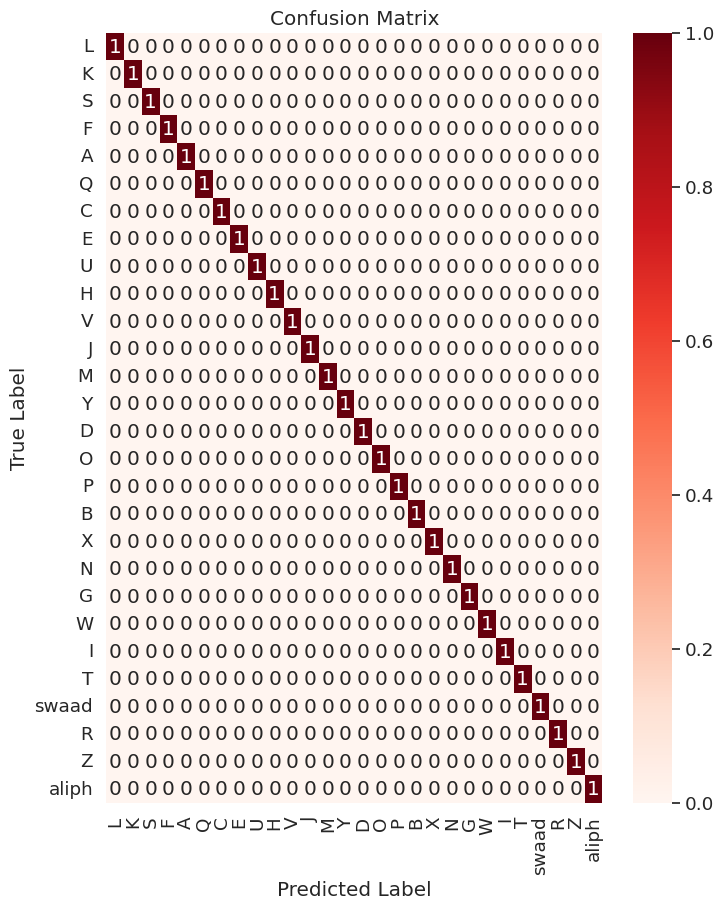

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Actual data
true_labels = ['L', 'K', 'S', 'F', 'A', 'Q', 'C', 'E', 'U', 'H', 'V', 'J', 'M', 'Y', 'D', 'O', 'P', 'B', 'X', 'N', 'G', 'W', 'I', 'T', 'swaad', 'R', 'Z', 'aliph']
predicted_labels = ['L', 'K', 'S', 'F', 'A', 'Q', 'C', 'E', 'U', 'H', 'V', 'J', 'M', 'Y', 'D', 'O', 'P', 'B', 'X', 'N', 'G', 'W', 'I', 'T', 'swaad', 'R', 'Z', 'aliph']

# Evaluate the model
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy:", accuracy)

# Generate confusion matrix
confusion_matrix_data = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 10))
sns.heatmap(confusion_matrix_data, annot=True, cmap='Reds',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


BLUE


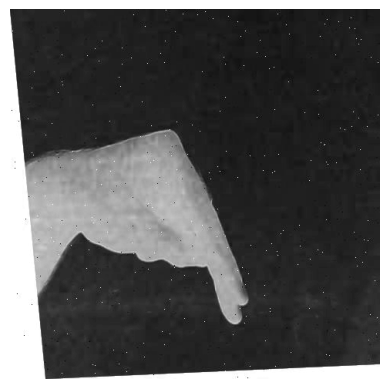

GREEN


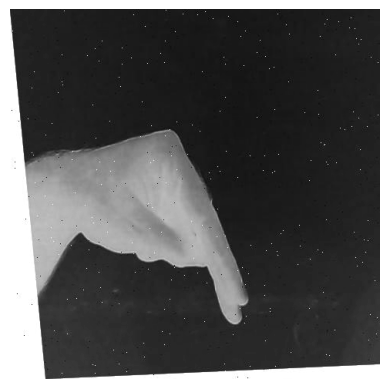

RED


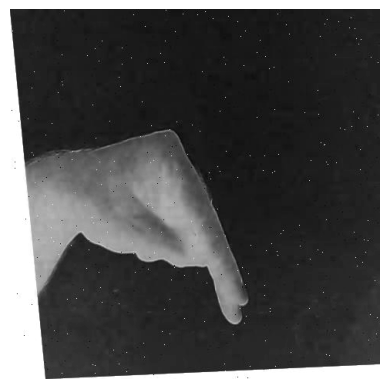

In [65]:
# # Assuming data contains the paths to the images
# # and you want to work with the first image
# first_img_path = data[0]['image_path']  # The path to your image
# loaded_img = cv2.imread(first_img_path)  # This loads the image

# # Inverting the contrast of the image
# # We will subtract the pixel values from the maximum value (255)
# contrast_inverted_img = 255 - loaded_img

# # The color channels are ordered as BGR in OpenCV, so the indexes will be:
# # 0: Blue, 1: Green, 2: Red
# color_channel_names = ['BLUE', 'GREEN', 'RED']

# # Display each channel
# for channel_index in range(3):
#     print(color_channel_names[channel_index])
#     plt.imshow(contrast_inverted_img[:,:,channel_index], 'gray')
#     plt.axis('off')  # This hides the axis
#     plt.show()




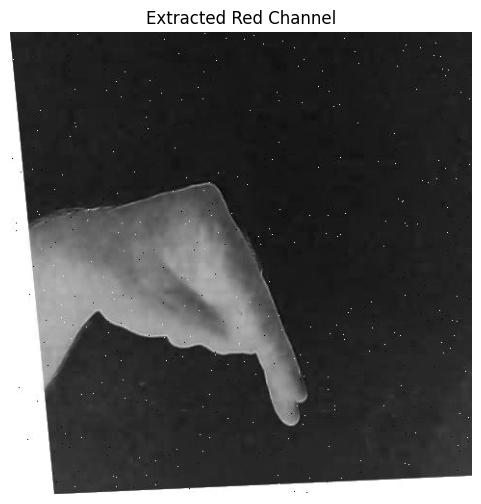

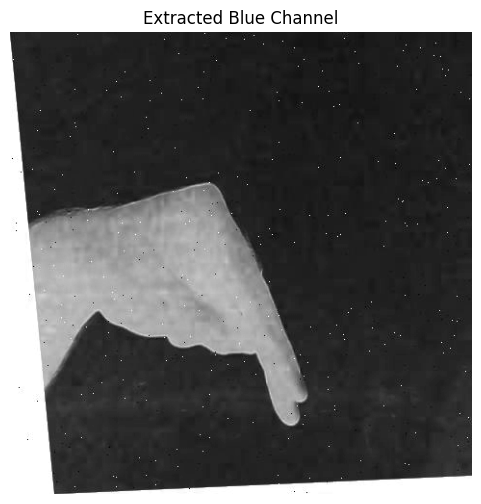

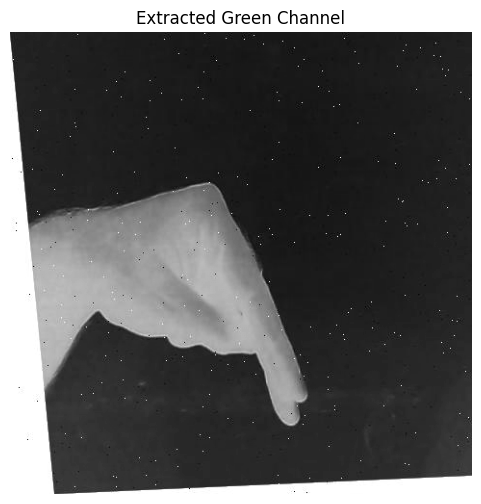

In [66]:
# # To extract the red channel, we access the third channel (index 2) because OpenCV uses BGR format
# extracted_red_channel = contrast_inverted_img[:,:,2]

# # To extract the blue channel, we access the first channel (index 0) because OpenCV uses BGR format
# extracted_blue_channel = contrast_inverted_img[:,:,0]

# # To extract the green channel, we access the second channel (index 1) because OpenCV uses BGR format
# extracted_green_channel = contrast_inverted_img[:,:,1]


# # Display the extracted red channel
# plt.figure(figsize=(6, 6))
# plt.imshow(extracted_red_channel, cmap='gray')
# plt.title('Extracted Red Channel')
# plt.axis('off')
# plt.show()

# # Display the extracted blue channel
# plt.figure(figsize=(6, 6))
# plt.imshow(extracted_blue_channel, cmap='gray')
# plt.title('Extracted Blue Channel')
# plt.axis('off')
# plt.show()

# # Display the extracted green channel
# plt.figure(figsize=(6, 6))
# plt.imshow(extracted_green_channel, cmap='gray')
# plt.title('Extracted Green Channel')
# plt.axis('off')
# plt.show()

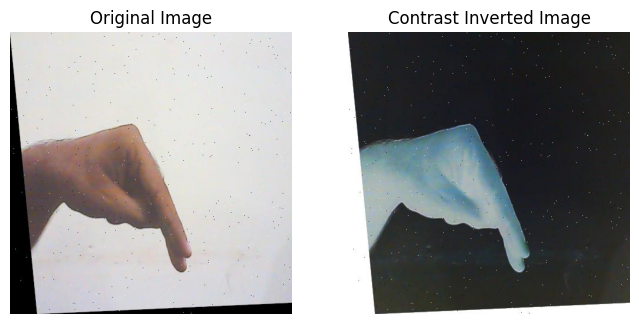

In [67]:
# Display the original and preprocessed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(loaded_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_inverted_img, cv2.COLOR_BGR2RGB))
plt.title('Contrast Inverted Image')
plt.axis('off')
plt.show()